In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:\\Users\\tharu\\Documents\\bharat.csv')


df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d') 
df = df.set_index('Date') 

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2014-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2014-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2014-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2014-07-03,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [16]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-14,213.600006,215.020004,211.539993,215.000000,215.000000,5051900
2023-06-15,215.740005,218.800003,212.029999,214.080002,214.080002,5416200
2023-06-16,213.690002,217.250000,212.309998,215.589996,215.589996,3225500
2023-06-17,219.000000,223.399994,218.000000,221.710007,221.710007,5179500
2023-06-18,229.149994,232.440002,224.210007,225.610001,225.610001,9320600


In [17]:
forecast_out = 60 # Number of how many days to forecast
df['Prediction'] = df['Adj Close'].shift(-forecast_out)

In [18]:
x = np.array(df.drop(labels=['Prediction'], axis=1))
x = x[:-forecast_out]


In [19]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:

linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

C:\Users\tharu\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.57952e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\tharu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.414e+05, tolerance: 2.300e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [22]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LinearModel score: 0.8841702189140466
RidgeModel score: 0.8841703295314717
LassoModel score: 0.8835879389529097


In [23]:
x_forecast = np.array(df.drop(labels=['Prediction'], axis=1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(labels=['Prediction'], axis=1)))
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(labels=['Prediction'], axis=1)))
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(labels=['Prediction'], axis=1)))


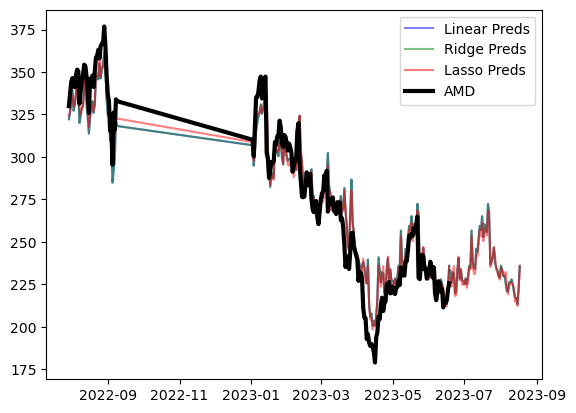

In [24]:
predicted_dates = []
recent_date = df.index.max()
display_at = 2100
alpha = 0.5

for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='AMD', c='black', linewidth=3)
plt.legend()